# Predicting employee churn with Python

<img src='img/churn.png' width='600px'> 

The goal of this notebook is to let you peek behind the shoulders of a data scientist. Only that there's no data scientist around, so you'll have to help yourself.

Scared? Don't be! We'll help you out, and the use case is light and fun!

Ultimately, the goal of the notebook will be that — in case you'll have to peek behind the shoulders of a real data scientist, you won't be (too) scared or surprised of what you'll see.

---

The data scientist was tasked to create a model to predict **employee churn**. In other words, **are we able to foresee whether a employee will leave**? 

This is a very common goal for a lot of companies because, if we can predict the likelihood of a employee churning, we can 

- Use this information to plan for future resource requirements or
- Implement interventions.

## Contents

<img src='img/check.png' width='350px' align='right'>

Throughout this notebook we are going to cover the following topics:

- [**Working with Jupyter Notebook**](#working)
- [**Steps to Model Development**](#steps)
    - [*Data Acquisition*](#data)
    - [*Data Cleaning*](#clean)
    - [*Exploratory Analysis*](#explore)
    - [*Model Development*](#model)
    - [*Model Refinement*](#refine)
- [**Summary**](#summary)

---
<a id = 'working'></a>
## Working with Jupyter Notebook

Before we get stuck in to our model development process, the first thing we want to do is get familiar with Jupyter Notebook. We don't need to know how the code works, but we need to be able to run the code in each cell. 

### Check that Jupyter is working
Run the cell below with the current code by clicking the run button at the top of this notebook. (Alternatively you can use CRTL+Enter (or Command+Enter on a Mac).

In [1]:
3 - 1

2

Does the code output look correct? The answer should be 2!

**Tip**: Be aware that we must run the cells in order! If you have not run a previous cell that the current cell relies on it may not work!

### Task: Load the libraries

Now that we know Python is working in our environment we can import some Python libraries. Everything below is pulling in some functionality that we will use to investigate the data and build our model. This next cell can be daunting, but don't worry, it's just boilerplate. Run this cell the same way you did with the cell above.

In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

/Users/herbertvanleeuwen/workingdir/at-industrialization/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


---


## Model Development

A predictive model uses statistics to predict outcomes.

<a id='steps'></a><img src='img/mod-dev.png' align='right' width='300px'>

The outcome we want to predict is to determine if a colleague will leave or not. 

To do so, we will use data from the past to teach a model relationships in that data.


### Steps to Model Development

There are 5 steps that we carry out when we build a model:

1. Data Acquisition
2. Data Cleaning
3. Exploratory Analysis
4. Model Development
5. Model Refining

---
<a id='steps'></a><img src='img/mod-dev1.png' align='right' width='300px'>
<a id='data'></a>
## Data Acquisition

Before doing any analysis, it's important to load the data in this notebook. 

Our data is an HR dataset that has the following columns:

|Column|Description|
|:---|:---|
| left |Whether the employee has left the company or not|
| satisfaction_level| Employee satisfaction point|
| last_evaluation| Evaluated performance by the employer|
| number_projects| # of projects assigned to an employee|
| average_monthly_hours| Average numbers of hours worked in a month?|
| time_spent_company| # of years spent in the company|
| work_accident| Whether an employee has had a work accident|
| promotion_last_5years| Whether an employee has had a promotion in the last 5 years|
| departments| Employee's department|
| salary| Salary level|

Let's load this data in! 

Run the cell below to load in the data and view the top 5 rows.

In [3]:
hr = pd.read_csv('HR.csv')
hr.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


Loading data was easy. This is often not the case, as the data might be locked in some database we don't have access to, or might be need to be retrieved from the internet, etc.

Luckily for us, the data was stored locally. 😅

---
<a id='steps'></a><img src='img/mod-dev2.png' align='right' width='300px'>
<a id='clean'></a>
## Data Cleaning

Now we can start with our cleaning process. There are many things we might want to clean in data. Luckily for us this dataset is already quite clean so we will only focus on the following:

1. Remove the column that contains what we want to predict (e.g. whether an employee has left or not) 
2. Convert all strings to numeric values

We will explain a little bit more about these in the following steps.

### 1. Remove the target variable

When we build a predictive model we need to split the data so that we have one dataset with the features (e.g. **satisfaction_level**, **last_evaluation**, etc.) and one dataset with only the target variable (what we want to predict, **left** in our case).

To remove the target variable, use the following code

In [4]:
hr_clean = hr.drop(columns=["left"])
hr_clean.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


We **will need to keep the target variable** so let's create a `target_variable` variable to store this by itself:

In [5]:
target_variable = hr['left']

### 2. Convert strings into numeric values

There is one extra step that we need to do before being able to apply machine learning models: the libraries we will use requires strings to be turned into numbers. Doing so is just a matter of using this code. 

Run the next cell to convert these columns and look at the data to check that `salary` and `Departments` are now indeed stored as numbers instead of strings

In [6]:
hr_clean['salary'] = label_encoder.fit_transform(hr_clean['salary'])
hr_clean['departments'] = label_encoder.fit_transform(hr_clean['departments'])

hr_clean.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


The dataset `hr_clean` will be useful for our modeling step!

---
<a id='steps'></a><img src='img/mod-dev3.png' align='right' width='300px'>
<a id='explore'></a>
## Exploratory Analysis

Before we build a model, we must understand our data. Now it's time to do some exploratory analysis. We could go very deep into this but for now we are just going to carry out three steps:

1. Using describe to see some standard statistics
2. Look at how the stats are impacted by whether an employee left
3. Visualise some more in-depth analysis

The easiest way to explore our data is to call `.describe()` on our dataset.

### 1. Using describe to see some standard statistics

By calling `.describe()` on our dataset we can easily see some standard statistics:

In [7]:
hr.describe()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


### 2. Look at how the stats are impacted by whether an employee left

Now we might want to look at how these statistics differ whether the employee left (`left=1`) or not (`left=2`).

We can combine what we did above with the `left` column to see this:

In [8]:
hr.groupby("left").describe().T

left                                    0            1
satisfaction_level    count  11428.000000  3571.000000
                      mean       0.666810     0.440098
                      std        0.217104     0.263933
                      min        0.120000     0.090000
                      25%        0.540000     0.130000
                      50%        0.690000     0.410000
                      75%        0.840000     0.730000
                      max        1.000000     0.920000
last_evaluation       count  11428.000000  3571.000000
                      mean       0.715473     0.718113
                      std        0.162005     0.197673
                      min        0.360000     0.450000
                      25%        0.580000     0.520000
                      50%        0.710000     0.790000
                      75%        0.850000     0.900000
                      max        1.000000     1.000000
number_project        count  11428.000000  3571.000000
                      mean       3.786664     3.855503
                      std        0.979884     1.818165
                      min        2.000000     2.000000
                      25%        3.000000     2.000000
                      50%        4.000000     4.000000
                      75%        4.000000     6.000000
                      max        6.000000     7.000000
average_montly_hours  count  11428.000000  3571.000000
                      mean     199.060203   207.419210
                      std       45.682731    61.202825
                      min       96.000000   126.000000
                      25%      162.000000   146.000000
                      50%      198.000000   224.000000
                      75%      238.000000   262.000000
                      max      287.000000   310.000000
time_spend_company    count  11428.000000  3571.000000
                      mean       3.380032     3.876505
                      std        1.562348     0.977698
                      min        2.000000     2.000000
                      25%        2.000000     3.000000
                      50%        3.000000     4.000000
                      75%        4.000000     5.000000
                      max       10.000000     6.000000
work_accident         count  11428.000000  3571.000000
                      mean       0.175009     0.047326
                      std        0.379991     0.212364
                      min        0.000000     0.000000
                      25%        0.000000     0.000000
                      50%        0.000000     0.000000
                      75%        0.000000     0.000000
                      max        1.000000     1.000000
promotion_last_5years count  11428.000000  3571.000000
                      mean       0.026251     0.005321
                      std        0.159889     0.072759
                      min        0.000000     0.000000
                      25%        0.000000     0.000000
                      50%        0.000000     0.000000
                      75%        0.000000     0.000000
                      max        1.000000     1.000000

The biggest difference seems to be in the employee's satisfaction: it is 0.66 on average for people who don't leave, and 0.44 on average for people who leave. Who would have thought, unsatisfied employees leave the company, after all. 

We will see if the model will pick up the same type of information.

### 3. Visualise some more in-depth analysis

Let's plot a histogram of the Average Monthly Hours of our employees and colour the chart according to whether the employee left or not:

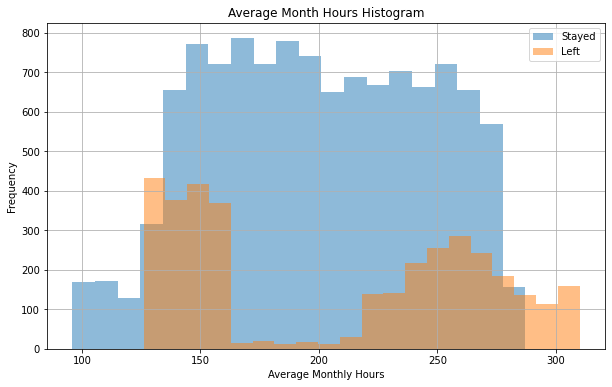

In [9]:
hr.groupby("left")['average_montly_hours'].hist(bins=20, alpha=0.5, figsize=(10,6), legend=True)

plt.title('Average Month Hours Histogram')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.legend(['Stayed','Left'])

plt.show()

From this chart we can see that Employees who left (orange) generally didn't work between 160-220 hours. The tendency is for people who left to have generally been working higher or lower hours, where employees who stayed generally don't work longer than 280 hours.

Let's see if this relationship gets picked up by the model.

Lastly, let's see if there is a relationship between colleagues having a work accident and leaving the company:

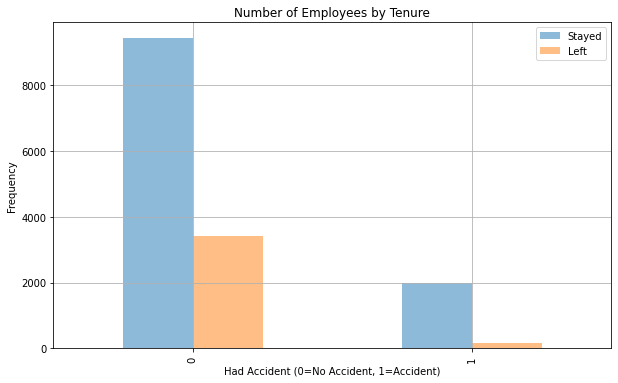

In [10]:
hr.groupby('work_accident')['left'].value_counts().unstack().plot(kind='bar',
                                                                  alpha=0.5, 
                                                                  figsize=(10,6), 
                                                                  grid=True,
                                                                  title='Number of Employees by Tenure',
                                                                  xlabel='Had Accident (0=No Accident, 1=Accident)',
                                                                  ylabel='Frequency')
plt.legend(['Stayed','Left'])
plt.show()

There doesn't seem to be a high proportion of the colleagues who had an accident that left. This may not be a contibuting factor to colleagues leaving.

Let's see if the model picks this up!

---

There are many more visualizations you can try. If you're curious, you can customize the code below to see even more!

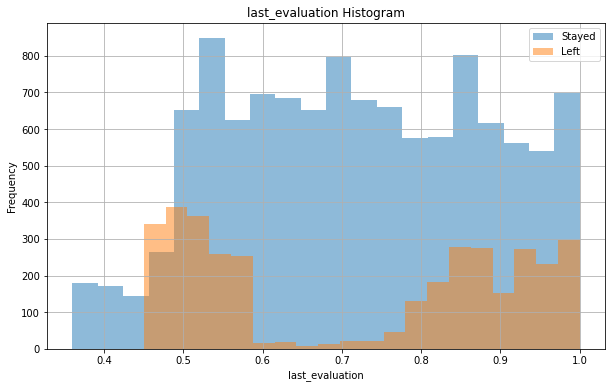

In [15]:
column_to_investigate = "last_evaluation"  # BUT CHANGE IT IF YOU WANT! For example to "number_project"
hr.groupby("left")[column_to_investigate].hist(bins=20, alpha=0.5, figsize=(10,6), legend=True)

plt.title(f'{column_to_investigate} Histogram')
plt.xlabel(column_to_investigate)
plt.ylabel('Frequency')
plt.legend(['Stayed','Left'])

plt.show()

In this section, we looked at exploratory data analysis. We saw how easy Python makes it, in numeric or visual form! 

---
<a id='steps'></a><img src='img/mod-dev4.png' align='right' width='300px'>
<a id='model'></a>
## Model Development

Now we can get into building our model. Here are the steps we need to follow when building:

1. Split the data into train and test
2. Choose & build the model
3. Evaluate the model

### 1. Split into train and test

When building a model, we need to split the data into train set and test set. This is because we need to evaluate our model on unseen data.

Why do we do that? Well, it's just like when taking a test in high school. You want to prepare on something similar to the exam, but not exactly the same. It would be cheating otherwise and we wouldn't really learn anything. 

Data scientists cares deeply that their model really learn and don't cheat. Hence the split!

We can run the cell below to split both the **features** (`hr_clean`) and the **target** (`target_variable`) into 75% train and 25% test. The model will learn on the train, and will be tested on… test!

In [12]:
X, X_test, y, y_test = train_test_split(hr_clean, target_variable)

### 2. Choosing the type of model

Lots of factors go in to choosing a model. We are going to use a Decision Tree because it is a easy-to-understand model often with good predictive power.

The code below fits a model to the data using an algorithm called `DecisionTree`. We store the results in an object called `decision_tree_model`.

In [14]:
decision_tree_model = DecisionTree()
decision_tree_model.fit(X, y)

DecisionTreeClassifier()

Note the models has learned (with `.fit`) on `X` & `y`: it has never seen `X_test` & `y_test`.

### 3. Evaluate the Model

We can now use `decision_tree_model` to make predictions on the `X_test` set. Let's do that & look at the first 10 predicitions:

In [15]:
y_predicted = decision_tree_model.predict(X_test)
print('First ten predictions:', y_predicted[:10])

First ten predictions: [0 0 1 0 0 0 0 0 1 0]


We could go back to y_test and see how many are correct (how many did we say were 0 or 1 that **actually were** 0 or 1?). 

Instead we can use Python to compared the entire list! Phew!

In [16]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.9714666666666667


This tells how often we correctly guess if an employee in the test data will leave or stay. Pretty good!

**Accuracy only tells us so much**.

Accuracy tells us how correct we are for each value, but can we see ***how*** we were correct? I.e. do we do better are predicting people leaving or people staying?

Data scientists use a tool called the confusion matrix. The name indicates how often the model is… confused.

In [17]:
confusion_matrix = pd.crosstab(y_test,
                               y_predicted, 
                               rownames=['Actual'], 
                               colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,2804,67
1,40,839


You can read the confusion matrix as follows:

- Top left: the model says the employee stays, and they stay (called by data scientists **True Positive**)
- Top right: the model says the employee leaves, but they stay (called by data scientists **False Negative**)
- Bottom left: the model says the employee stays, but they leave (called by data scientists **False Positive**)
- Bottom right: the model says the employee leaves, and they leave (called by data scientists **True Negative**)

<a id='steps'></a><img src='img/mod-dev5.png' align='right' width='300px'>
<a id='refine'></a>
## Model Refinement

There's a few ways we can look to refine our model. We might want to do this to make it more powerful, or make it simpler so that it is easier to manage in the future.

We are going to:

1. Try a different model
2. Remove features

### 1. Try a different model

We can try a different model now — and we will use one called Random Forest — to see if we are able to get better predictions! The only bit that needs to change is the name of the algorithm (called `RandomForest`), because our data doesn't change!

In [18]:
random_forest_model = RandomForest(n_estimators=100)
random_forest_model.fit(X, y)
y_predicted = random_forest_model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.9906666666666667


This model has a better accuracy. If we have a look at the confusion matrix we can see that we are much better at finding those colleagues who left!

Predicted,0,1
Actual,,
0,2868,3
1,32,847


### 2. Remove some feature

We might want to consider the amount of features that we include in our model as fewer features (a simpler model) may be easier to maintain in the long run.

With many models, we can plot the features **the model** thought were the most important:

<AxesSubplot:title={'center':'Feature Importance in the Random Forest'}>

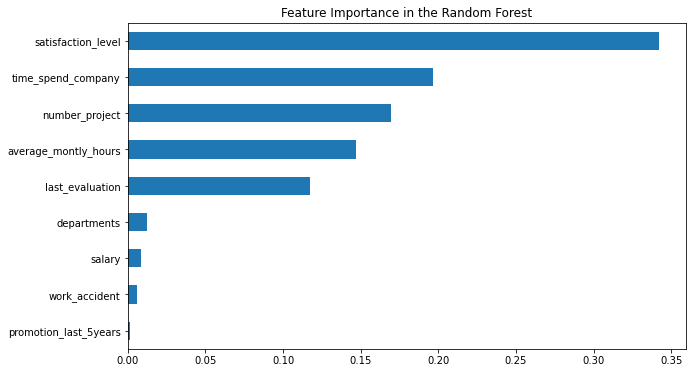

In [20]:
feat_importance = pd.Series(random_forest_model.feature_importances_, index=hr_clean.columns)

feat_importance.sort_values().plot(kind='barh', 
                                   figsize=(10,6),
                                   title='Feature Importance in the Random Forest')

What happens if the create a model using only the top 3 variables?

In [16]:
hr_short = hr[["satisfaction_level", "time_spend_company", "number_project"]]
X, X_test, y, y_test = train_test_split(hr_short, hr.left)
hr_short.head()

,satisfaction_level,time_spend_company,number_project
0,0.38,3,2
1,0.80,6,5
2,0.11,4,7
3,0.72,5,5
4,0.37,3,2


Since we have **new data** we need to **retrain the Random Forest model**. Let's do this and print the accuracy:

In [17]:
random_forest_model = RandomForest(n_estimators=100)
random_forest_model.fit(X, y)
y_predicted = random_forest_model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.9674666666666667


This is still very high in terms of accuracy! We'd want to keep evaluating the model with other metrics (such as the confusion matrix along with others) but this is a good start.

---

Remember: there is always a **balance** when it comes to building a model. Do we need to be as accurate as possible or is it better to have a simpler model? 

- A more accurate model** will ensure we can accurately detect how many employees may leave or not. This would be good for activities such as planning resources.
- With a **simper model** we can easily see what **relationships cause employees to leave**. This would be good if we wanted to decrease employee turnover.

---
<a id='summary'></a>

## Summary

<img src='img/summary.png' width=' 400px' align='right'>

We have now built multiple predictive models using Python to predict the employee churn. During this process we:
- **Cleaned the data** by extracting the **target variable** — called **left** in our case
- **Split the data** so that we can train a model using only train data (`X` and `y`) and hold out our test data (`X_test` and `y_test`) to evaluate how the model performs on unseen data.
- **Built a Decision Tree** to create some predictions on the test data. Using these predicted values we could compare back to the actually target values to evaluate the model performance
- **Refined the model** both by choosing a more powerful algorithm (`Random Forest`) and by removing some features using the feature importance as defined by the model.

---